In [0]:
from google.colab import drive

In [101]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import os
import h5py as h5
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

tf.set_random_seed(42)
%matplotlib inline

In [0]:
with h5.File('/content/drive/My Drive/DeepLearningProject_Academics/Data/SVHN_single_grey1.h5','r') as input_file:
  X_train = input_file['X_train'][:]
  y_train = input_file['y_train'][:]
  X_val = input_file['X_test'][:]
  y_val = input_file['y_test'][:]

In [0]:
print(f'Xtrain Shape - {X_train.shape}')
print(f'Xval Shape - {X_val.shape}')
print(f'ytrain Shape - {y_train.shape}')
print(f'yval Shape - {y_val.shape}')

Xtrain Shape - (42000, 32, 32)
Xval Shape - (18000, 32, 32)
ytrain Shape - (42000,)
yval Shape - (18000,)


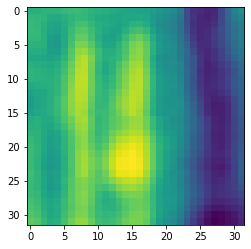

Label:  4


In [0]:
plt.imshow(X_train[4])    # show number in the dataset
plt.show()
print('Label: ', y_train[4])

# Eventhough are three numbers in the below image, the middle number is the number to be recognized

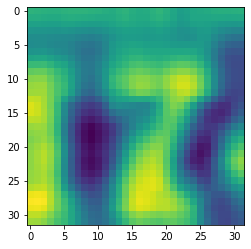

Label:  7


In [0]:
plt.imshow(X_val[1])    # show number in the dataset
plt.show()
print('Label: ', y_val[1])

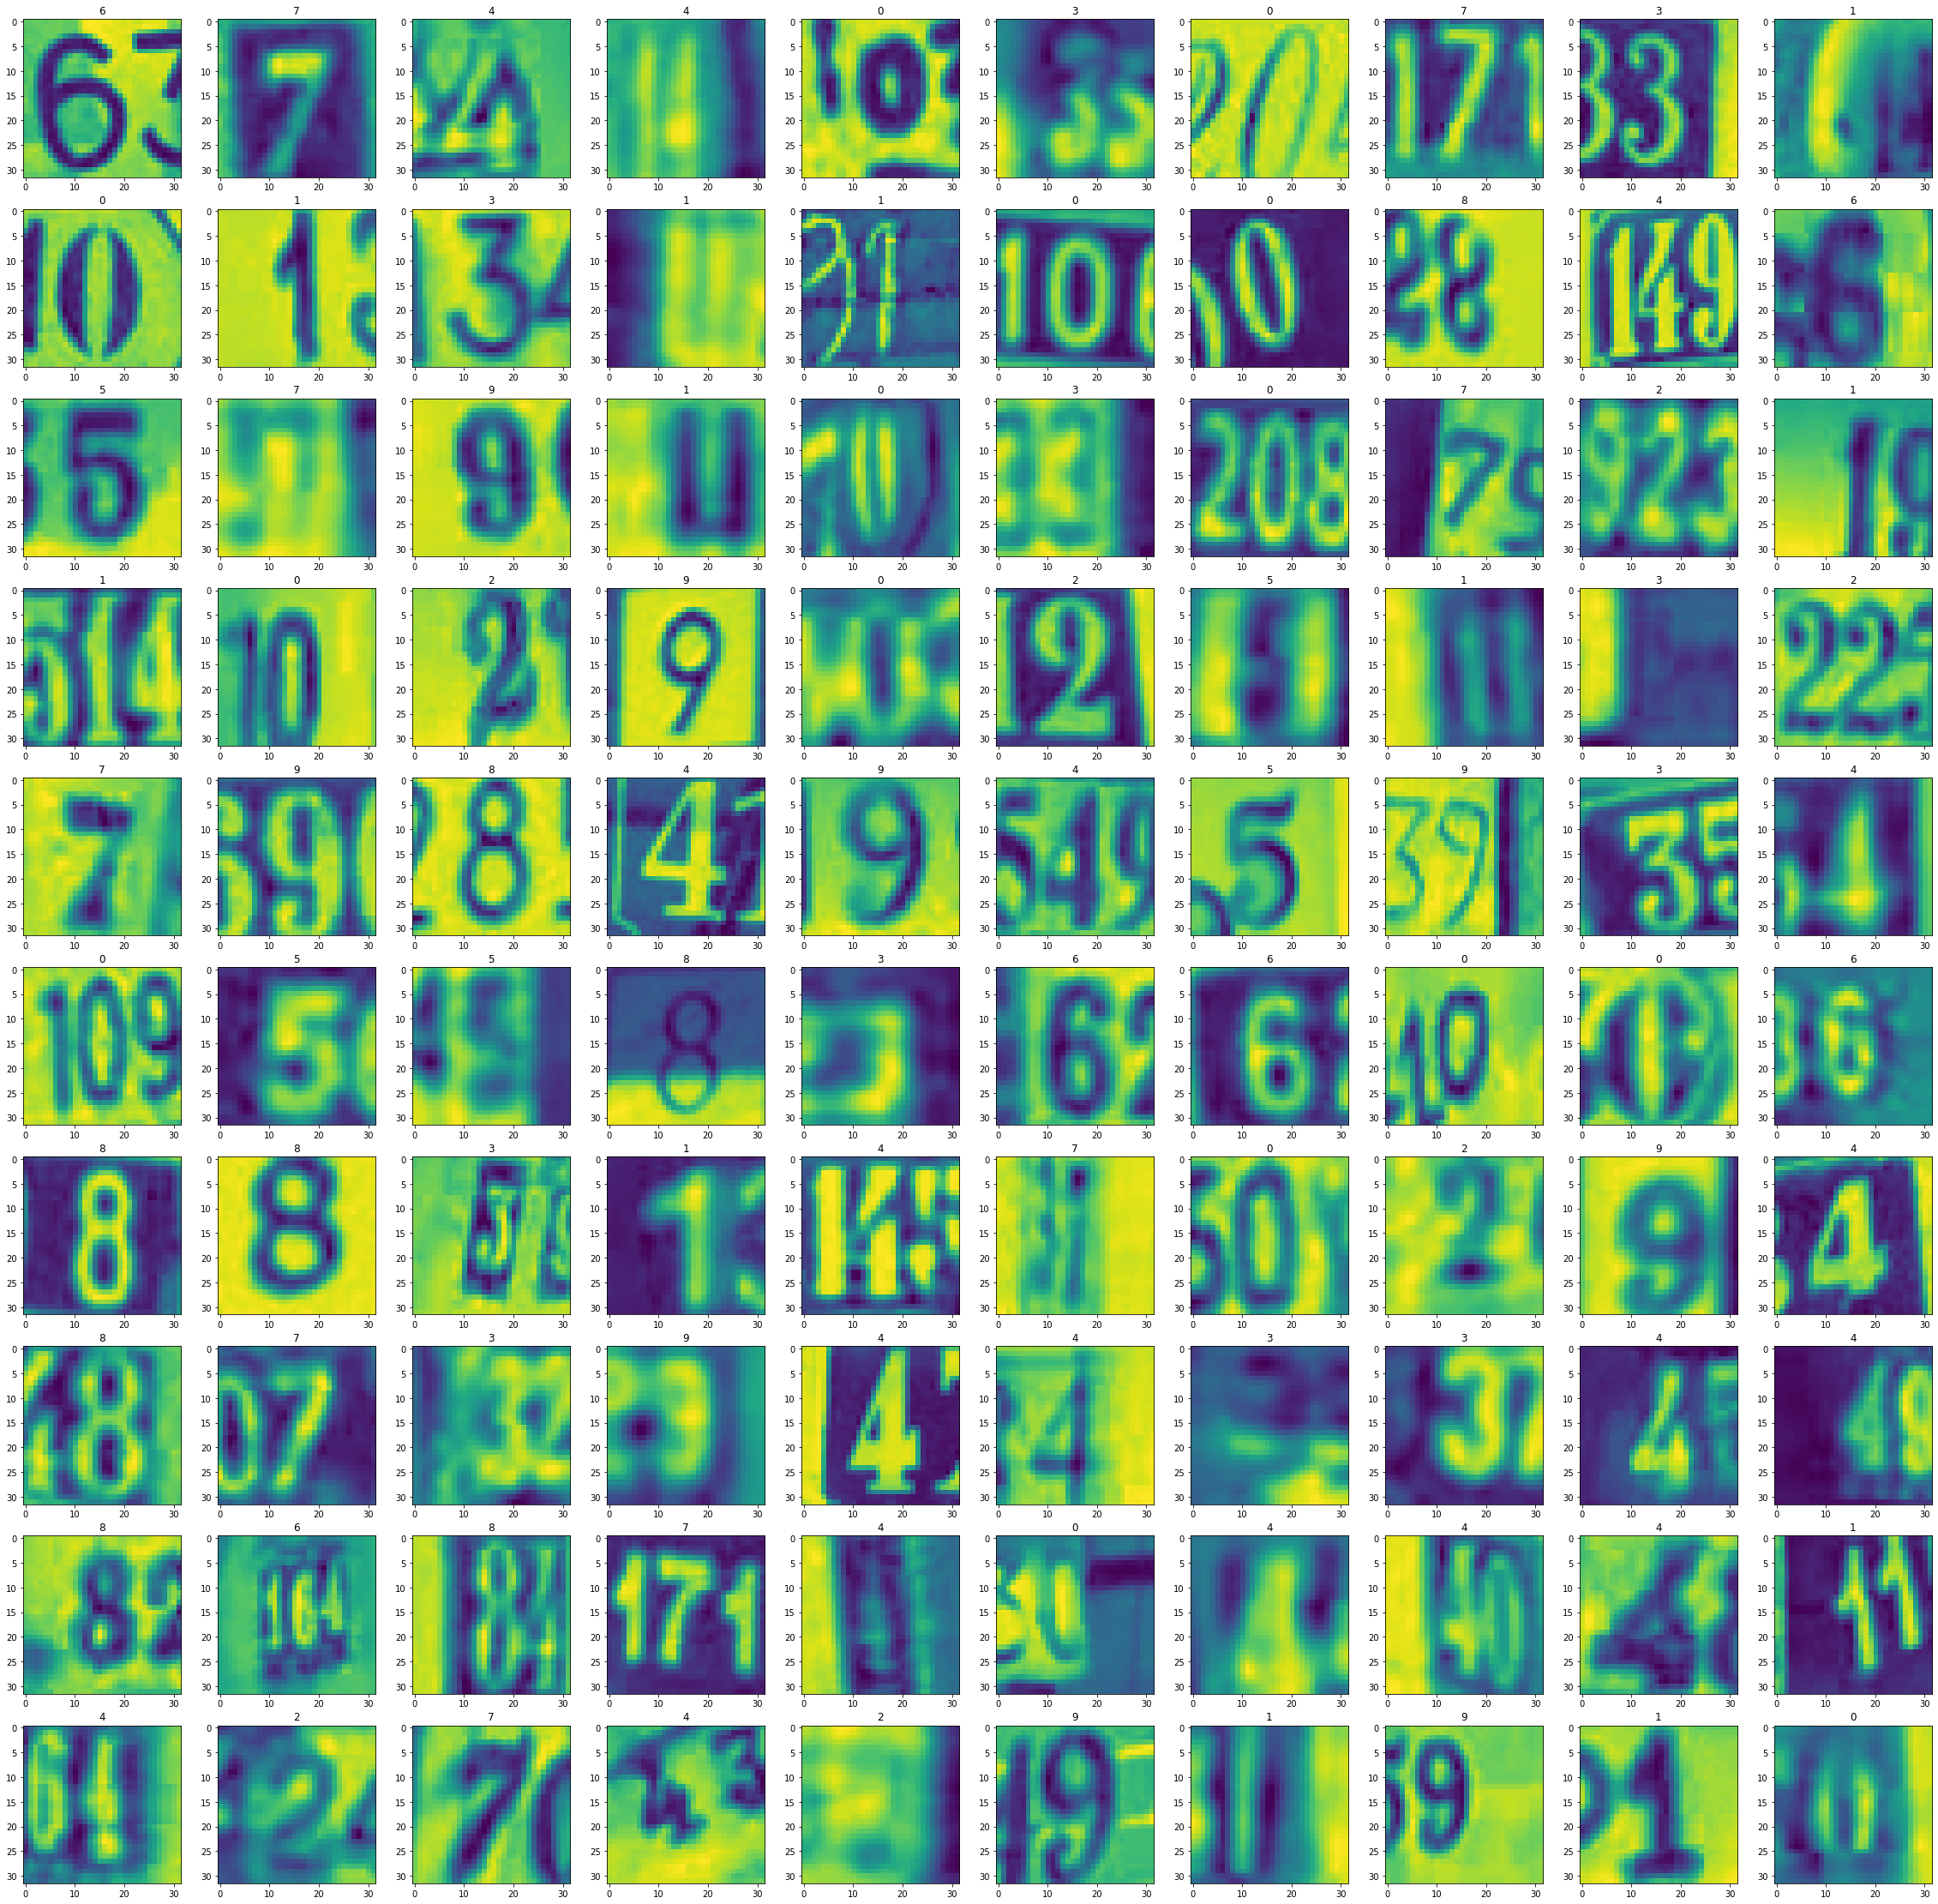

In [5]:
fig=plt.figure(figsize=(40, 40))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = X_train[i]
    fig.add_subplot(rows, columns, i)
    plt.title(y_train[i])
    plt.imshow(img)
plt.show()

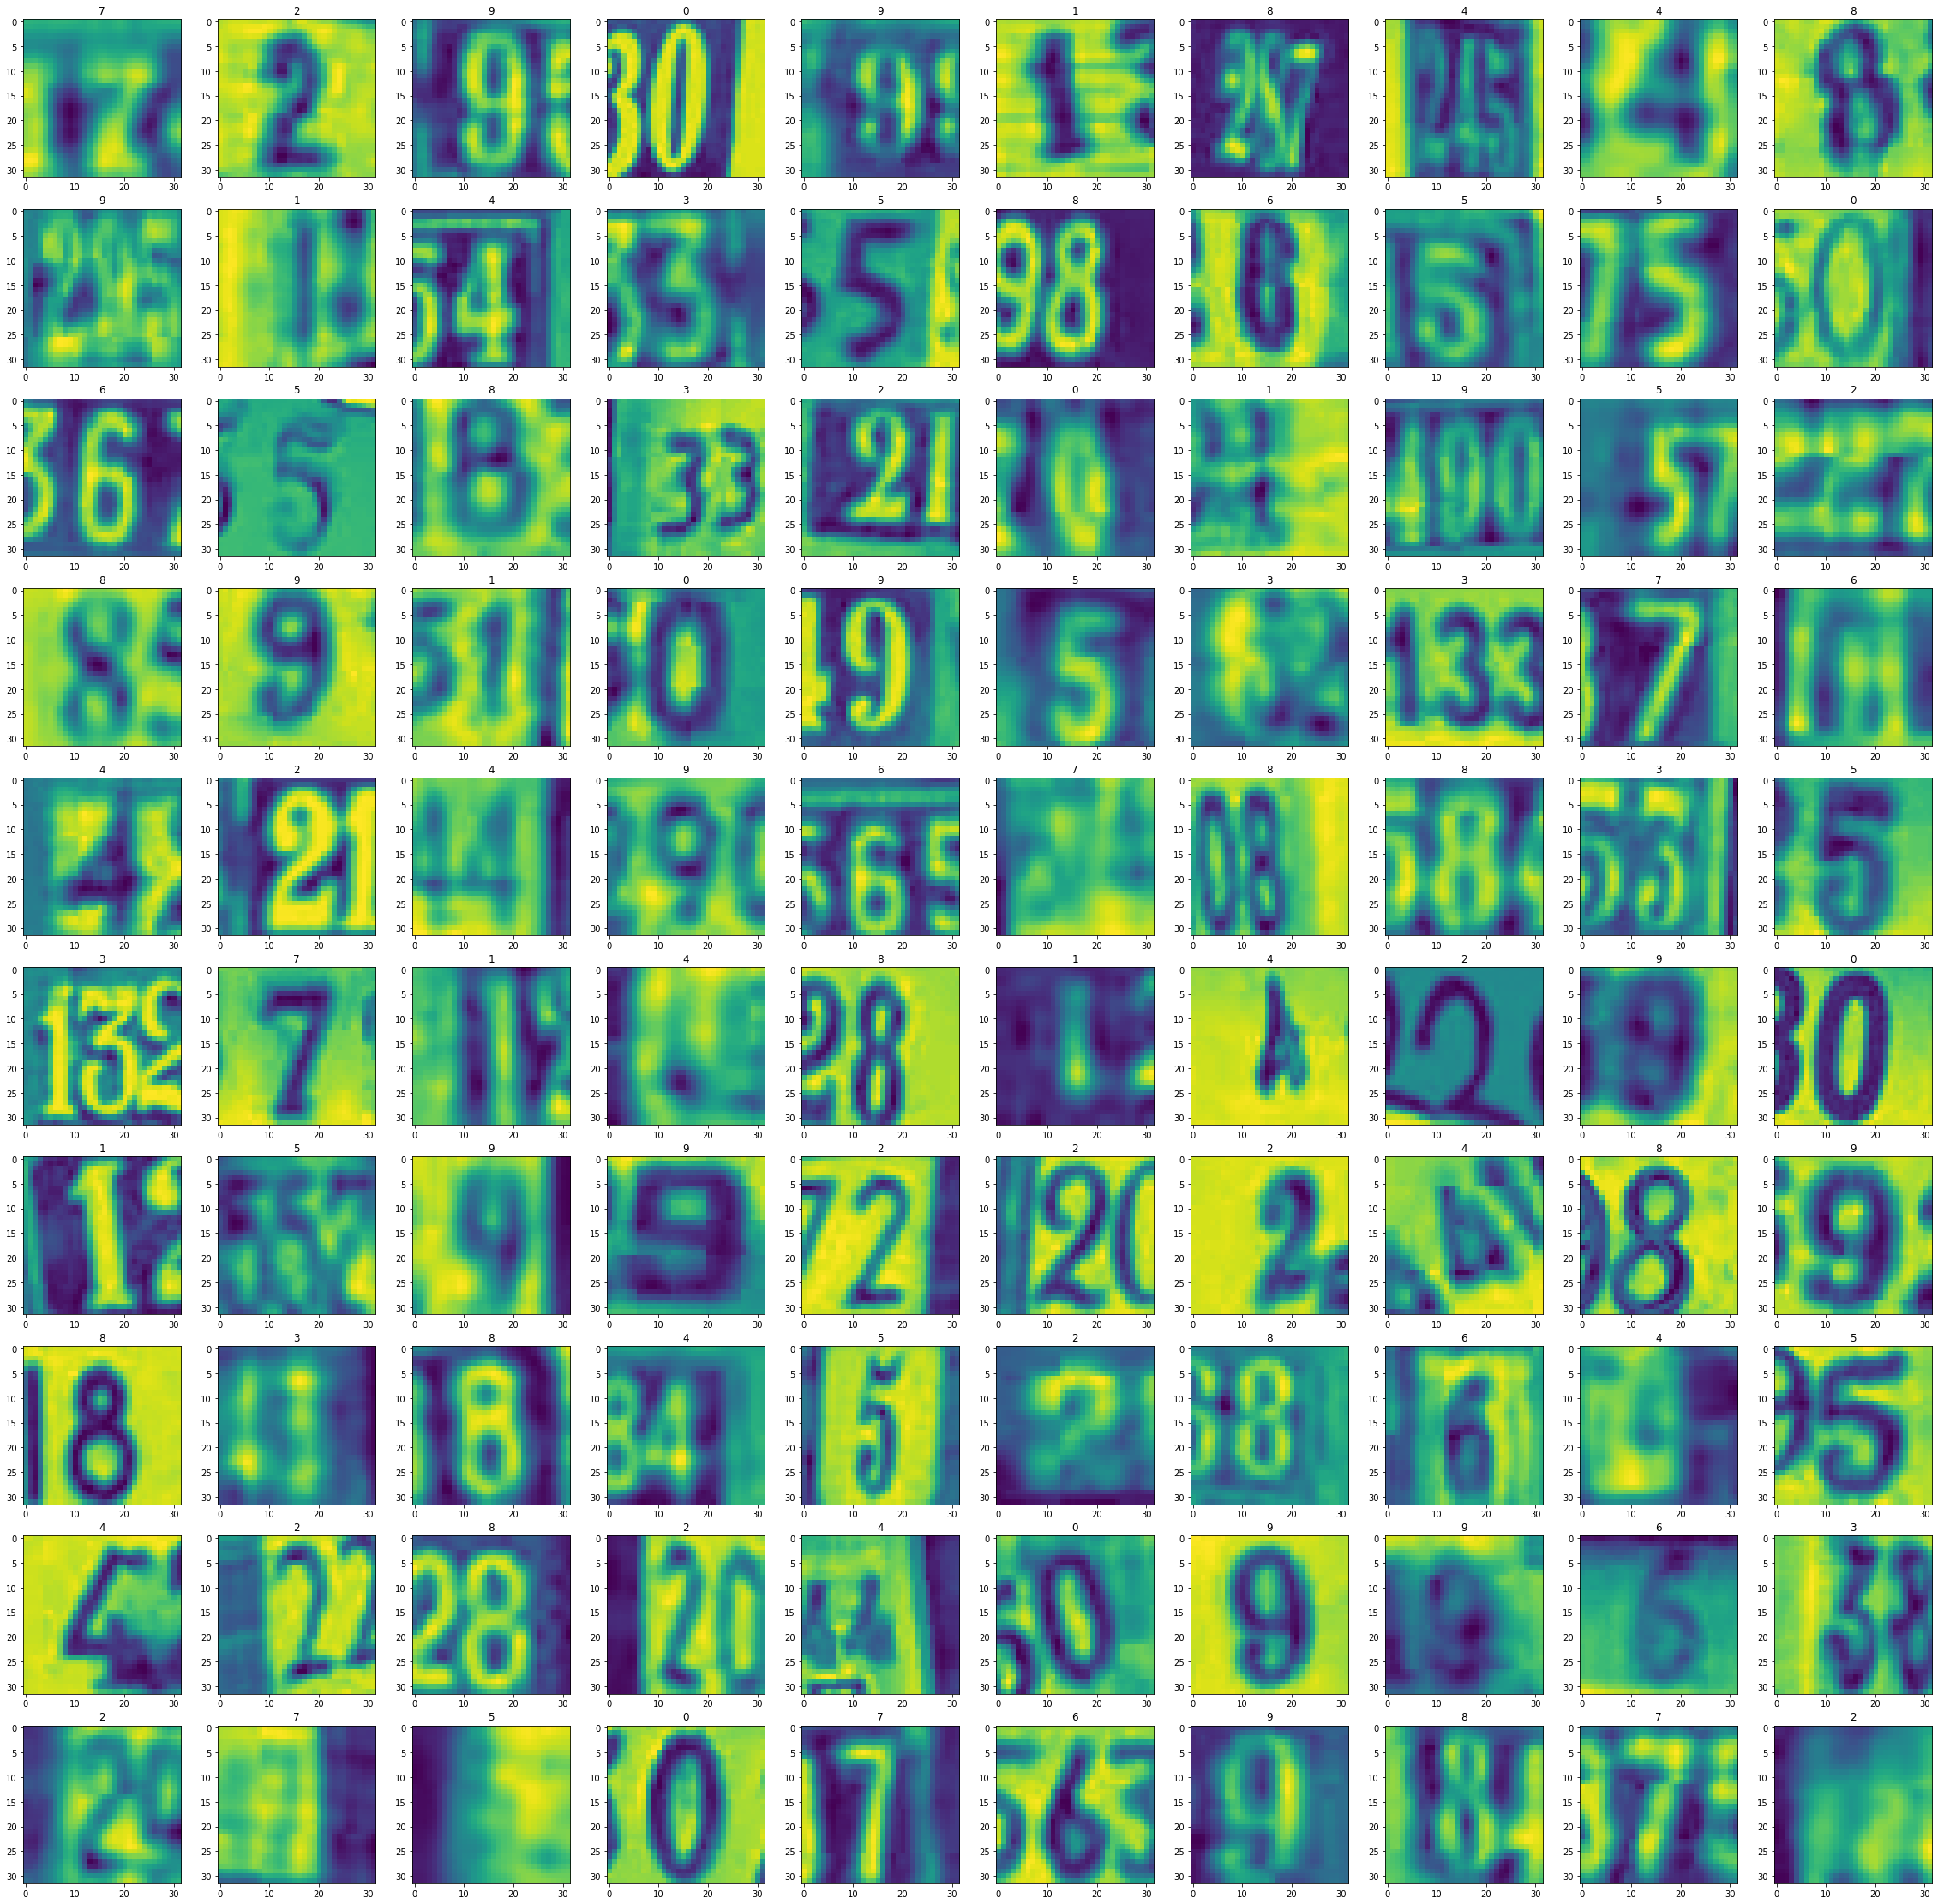

In [0]:
fig=plt.figure(figsize=(40, 40))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = X_val[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.title(y_val[i])
plt.show()

In [0]:
print(min(y_train))
print(max(y_train))

print(min(y_val))
print(max(y_val))

0
9
0
9


In [6]:
X_train = X_train.reshape(X_train.shape[0],1024)
X_val = X_val.reshape(X_val.shape[0],1024)

print(f'Xtrain Shape - {X_train.shape}')
print(f'Xval Shape - {X_val.shape}')

Xtrain Shape - (42000, 1024)
Xval Shape - (18000, 1024)


Reshaped Training and Testing data and Flatten it from 32*32 to 1024

In [0]:
print(y_train[0])
print(y_val[0])

2
1


In [0]:

y_train = to_categorical(y_train,num_classes=10)
y_val = to_categorical(y_val,num_classes=10)

# Convert the image label to be predicted as a ten class categorical variable

In [0]:
print(y_train[0])
print(y_val[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
model = Sequential()

In [0]:
  
  model.add(tf.keras.layers.Dense(64, activation = 'relu'))
  
  model.add(tf.keras.layers.Dense(300,activation='relu'))
  
  model.add(tf.keras.layers.Dense(250,activation='relu'))
  
  model.add(tf.keras.layers.Dense(200,activation='relu'))
  
  model.add(tf.keras.layers.Dense(150,activation='relu'))
  
  model.add(tf.keras.layers.Dense(100,activation='relu'))

  model.add(tf.keras.layers.Dense(10,activation='sigmoid')) #10 outputs needed (0-9)

In [0]:
model.compile(optimizer='sgd',loss='mse',metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, batch_size = 750, epochs = 100, verbose = 1)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 43us/sample - loss: 0.2712 - acc: 0.0992
Epoch 2/100
42000/42000 [==============================] - 0s 6us/sample - loss: 0.2602 - acc: 0.0989
Epoch 3/100
42000/42000 [==============================] - 0s 6us/sample - loss: 0.2601 - acc: 0.0984
Epoch 4/100
42000/42000 [==============================] - 0s 6us/sample - loss: 0.2601 - acc: 0.0984
Epoch 5/100
42000/42000 [==============================] - 0s 7us/sample - loss: 0.2600 - acc: 0.0982
Epoch 6/100
42000/42000 [==============================] - 0s 6us/sample - loss: 0.2600 - acc: 0.0981
Epoch 7/100
42000/42000 [==============================] - 0s 7us/sample - loss: 0.2599 - acc: 0.0983
Epoch 8/100
42000/42000 [==============================] - 0s 6us/sample - loss: 0.2599 - acc: 0.0981
Epoch 9/100
42000/42000 [==============================] - 0s 6us/sample - loss

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              multiple                  65600     
_________________________________________________________________
dense_8 (Dense)              multiple                  19500     
_________________________________________________________________
dense_9 (Dense)              multiple                  75250     
_________________________________________________________________
dense_10 (Dense)             multiple                  50200     
_________________________________________________________________
dense_11 (Dense)             multiple                  30150     
_________________________________________________________________
dense_12 (Dense)             multiple                  15100     
_________________________________________________________________
dense_13 (Dense)             multiple                 

In [0]:
results_train = model.evaluate(X_train, y_train)
results_test = model.evaluate(X_val, y_val)

18000/18000 [==============================] - 1s 44us/sample - loss: 0.2578 - acc: 0.1016


A neural network with hidden layers with neurons and activation functions, without the zero centering of mean and no weight initialization in the output of each stage produces a very small accuracy of just 10 percent. Lets try with softmax function at the output layer

In [0]:
print('Train accuracy: ', results_train[1])
print('Test accuracy: ', results_test[1])

Train accuracy:  0.09933333
Test accuracy:  0.101555556


In [0]:
tf.keras.backend.clear_session()
tf.set_random_seed(42)
model = Sequential()

with h5.File('/content/drive/My Drive/DeepLearningProject_Academics/Data/SVHN_single_grey1.h5','r') as input_file:
  X_train = input_file['X_train'][:]
  y_train = input_file['y_train'][:]
  X_val = input_file['X_test'][:]
  y_val = input_file['y_test'][:]

X_train = X_train.reshape(X_train.shape[0],1024)
X_val = X_val.reshape(X_val.shape[0],1024)

y_train = to_categorical(y_train,num_classes=10)
y_val = to_categorical(y_val,num_classes=10)

In [0]:
  model.add(tf.keras.layers.Dense(64, activation = 'relu'))
  
  model.add(tf.keras.layers.Dense(300,activation='relu'))
  
  model.add(tf.keras.layers.Dense(250,activation='relu'))
  
  model.add(tf.keras.layers.Dense(200,activation='relu'))
  
  model.add(tf.keras.layers.Dense(150,activation='relu'))
  
  model.add(tf.keras.layers.Dense(100,activation='relu'))

  model.add(tf.keras.layers.Dense(10,activation='softmax')) 

In [0]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, batch_size = 750, epochs = 100, verbose = 1)

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 0s 8us/sample - loss: nan - acc: 0.1004
Epoch 2/100
42000/42000 [==============================] - 0s 7us/sample - loss: nan - acc: 0.0997
Epoch 3/100
42000/42000 [==============================] - 0s 7us/sample - loss: nan - acc: 0.0997
Epoch 4/100
42000/42000 [==============================] - 0s 7us/sample - loss: nan - acc: 0.0997
Epoch 5/100
42000/42000 [==============================] - 0s 7us/sample - loss: nan - acc: 0.0997
Epoch 6/100
42000/42000 [==============================] - 0s 7us/sample - loss: nan - acc: 0.0997
Epoch 7/100
42000/42000 [==============================] - 0s 7us/sample - loss: nan - acc: 0.0997
Epoch 8/100
42000/42000 [==============================] - 0s 7us/sample - loss: nan - acc: 0.0997
Epoch 9/100
42000/42000 [==============================] - 0s 7us/sample - loss: nan - acc: 0.0997
Epoch 10/100
42000/42000 [==============================] - 0s 7us/sample - loss: nan 

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  65600     
_________________________________________________________________
dense_1 (Dense)              multiple                  19500     
_________________________________________________________________
dense_2 (Dense)              multiple                  75250     
_________________________________________________________________
dense_3 (Dense)              multiple                  50200     
_________________________________________________________________
dense_4 (Dense)              multiple                  30150     
_________________________________________________________________
dense_5 (Dense)              multiple                  15100     
_________________________________________________________________
dense_6 (Dense)              multiple                  1

In [0]:
results_train = model.evaluate(X_train, y_train)
results_test = model.evaluate(X_val, y_val)

print('Train accuracy: ', results_train[1])
print('Test accuracy: ', results_test[1])

18000/18000 [==============================] - 1s 48us/sample - loss: nan - acc: 0.1008
Train accuracy:  0.09966667
Test accuracy:  0.100777775


# There are no improvements in the performance of the model, on using a softmax function at the output

# Lets try this model with the same softmax function, by having weights initialized at the hidden layers 

# We know that initializing every weight with zero is not a good practice as the gradients will eventually be zero after some runs and no backprop will occur or a less effective backprop , so lets first initialize with random uniform weights

In [0]:
tf.keras.backend.clear_session()
tf.set_random_seed(42)
model = Sequential()

with h5.File('/content/drive/My Drive/DeepLearningProject_Academics/Data/SVHN_single_grey1.h5','r') as input_file:
  X_train = input_file['X_train'][:]
  y_train = input_file['y_train'][:]
  X_val = input_file['X_test'][:]
  y_val = input_file['y_test'][:]

X_train = X_train.reshape(X_train.shape[0],1024)
X_val = X_val.reshape(X_val.shape[0],1024)

y_train = to_categorical(y_train,num_classes=10)
y_val = to_categorical(y_val,num_classes=10)

In [0]:
  
  model.add(tf.keras.layers.Dense(64, activation = 'relu',kernel_initializer='random_uniform'))
  
  model.add(tf.keras.layers.Dense(200,activation='relu',kernel_initializer='random_uniform'))
  
  model.add(tf.keras.layers.Dense(150,activation='relu',kernel_initializer='random_uniform'))
  
  model.add(tf.keras.layers.Dense(150,activation='relu',kernel_initializer='random_uniform'))
  
  model.add(tf.keras.layers.Dense(100,activation='relu',kernel_initializer='random_uniform'))
  
  model.add(tf.keras.layers.Dense(100,activation='relu',kernel_initializer='random_uniform'))

  model.add(tf.keras.layers.Dense(10,activation='softmax',kernel_initializer='random_uniform'))

In [0]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, batch_size = 750, epochs = 150, verbose = 1)

Train on 42000 samples
Epoch 1/150
42000/42000 [==============================] - 0s 7us/sample - loss: 2.3025 - acc: 0.1005
Epoch 2/150
42000/42000 [==============================] - 0s 7us/sample - loss: 2.3024 - acc: 0.1080
Epoch 3/150
42000/42000 [==============================] - 0s 6us/sample - loss: 2.3023 - acc: 0.1129
Epoch 4/150
42000/42000 [==============================] - 0s 6us/sample - loss: 2.3023 - acc: 0.1127
Epoch 5/150
42000/42000 [==============================] - 0s 7us/sample - loss: 2.3022 - acc: 0.1129
Epoch 6/150
42000/42000 [==============================] - 0s 6us/sample - loss: 2.3021 - acc: 0.1139
Epoch 7/150
42000/42000 [==============================] - 0s 6us/sample - loss: 2.3020 - acc: 0.1122
Epoch 8/150
42000/42000 [==============================] - 0s 7us/sample - loss: 2.3019 - acc: 0.1144
Epoch 9/150
42000/42000 [==============================] - 0s 6us/sample - loss: 2.3018 - acc: 0.1134
Epoch 10/150
42000/42000 [==============================] -

In [0]:
results = model.evaluate(X_val, y_val)
print(f'Accuracy: {results[1]}')

18000/18000 [==============================] - 1s 58us/sample - loss: 0.8093 - acc: 0.7505
Accuracy: 0.7505000233650208


# When weights are normally distribued as a gaussian in each layer, we can clearly see, how much the prediction of the model has improved.

# We still have not regularised the input. We can try batch normalisation and dropout at each layer to furthur measure the performance

In [0]:
tf.keras.backend.clear_session()
tf.set_random_seed(42)
model = Sequential()



In [0]:
with h5.File('/content/drive/My Drive/DeepLearningProject_Academics/Data/SVHN_single_grey1.h5','r') as input_file:
  X_train = input_file['X_train'][:]
  y_train = input_file['y_train'][:]
  X_val = input_file['X_test'][:]
  y_val = input_file['y_test'][:]

X_train = X_train.reshape(X_train.shape[0],1024)
X_val = X_val.reshape(X_val.shape[0],1024)

y_train = to_categorical(y_train,num_classes=10)
y_val = to_categorical(y_val,num_classes=10)

In [0]:
  
  model.add(tf.keras.layers.Dense(64, activation = 'relu',kernel_initializer='random_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
  
  model.add(tf.keras.layers.Dense(200,activation='relu',kernel_initializer='random_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
  
  model.add(tf.keras.layers.Dense(150,activation='relu',kernel_initializer='random_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
  
  model.add(tf.keras.layers.Dense(150,activation='relu',kernel_initializer='random_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
  
  model.add(tf.keras.layers.Dense(100,activation='relu',kernel_initializer='random_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
  
  model.add(tf.keras.layers.Dense(100,activation='relu',kernel_initializer='random_uniform'))
  model.add(tf.keras.layers.BatchNormalization())

  model.add(tf.keras.layers.Dense(10,activation='softmax',kernel_initializer='random_uniform')) 

In [0]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, batch_size = 750, epochs = 150, verbose = 1)

Train on 42000 samples
Epoch 1/150
42000/42000 [==============================] - 1s 22us/sample - loss: 2.2700 - acc: 0.1563
Epoch 2/150
42000/42000 [==============================] - 1s 12us/sample - loss: 2.0045 - acc: 0.3355
Epoch 3/150
42000/42000 [==============================] - 1s 12us/sample - loss: 1.6331 - acc: 0.4912
Epoch 4/150
42000/42000 [==============================] - 1s 13us/sample - loss: 1.3279 - acc: 0.5948
Epoch 5/150
42000/42000 [==============================] - 0s 12us/sample - loss: 1.1327 - acc: 0.6545
Epoch 6/150
42000/42000 [==============================] - 1s 13us/sample - loss: 1.0045 - acc: 0.6933
Epoch 7/150
42000/42000 [==============================] - 1s 12us/sample - loss: 0.9041 - acc: 0.7245
Epoch 8/150
42000/42000 [==============================] - 1s 13us/sample - loss: 0.8334 - acc: 0.7431
Epoch 9/150
42000/42000 [==============================] - 1s 14us/sample - loss: 0.7728 - acc: 0.7624
Epoch 10/150
42000/42000 [========================

In [0]:
results_train = model.evaluate(X_train, y_train)
print(f'Accuracy: {results_train[1]}')

42000/42000 [==============================] - 3s 78us/sample - loss: 0.0500 - acc: 0.9851
Accuracy: 0.9851190447807312


In [0]:
results = model.evaluate(X_val, y_val)
print(f'Accuracy: {results[1]}')

18000/18000 [==============================] - 1s 77us/sample - loss: 0.9414 - acc: 0.8138
Accuracy: 0.8138333559036255


Clearly, the performance has improved after normalising the inputs. But we can also see the model is overfit with the training data. In one of the epochs, we can almost see the accuracy reaches close to100 percent. But in testing stage the accuracy is 80 percent

Lets try to minimise the number of neurons in each hidden layer and measure the performance of model before we can add a dropout at each layer

In [0]:
tf.keras.backend.clear_session()
tf.set_random_seed(42)
model = Sequential()

with h5.File('/content/drive/My Drive/DeepLearningProject_Academics/Data/SVHN_single_grey1.h5','r') as input_file:
  X_train = input_file['X_train'][:]
  y_train = input_file['y_train'][:]
  X_val = input_file['X_test'][:]
  y_val = input_file['y_test'][:]

X_train = X_train.reshape(X_train.shape[0],1024)
X_val = X_val.reshape(X_val.shape[0],1024)

y_train = to_categorical(y_train,num_classes=10)
y_val = to_categorical(y_val,num_classes=10)

In [0]:
  
  model.add(tf.keras.layers.Dense(150, activation = 'relu',kernel_initializer='random_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
  
  model.add(tf.keras.layers.Dense(100,activation='relu',kernel_initializer='random_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
  
  model.add(tf.keras.layers.Dense(50,activation='relu',kernel_initializer='random_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
 

  model.add(tf.keras.layers.Dense(10,activation='softmax',kernel_initializer='random_uniform'))

  # Removed three hidden layers, and reduced the neurons in the layer, as the number of parameters far exceed the number of rows for modelling,
  # which might cause the model to be overfit

In [0]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, batch_size = 750, epochs = 150, verbose = 1)

Train on 42000 samples
Epoch 1/150
42000/42000 [==============================] - 1s 21us/sample - loss: 2.2783 - acc: 0.1429
Epoch 2/150
42000/42000 [==============================] - 1s 13us/sample - loss: 2.0892 - acc: 0.2613
Epoch 3/150
42000/42000 [==============================] - 1s 13us/sample - loss: 1.8207 - acc: 0.3638
Epoch 4/150
42000/42000 [==============================] - 1s 13us/sample - loss: 1.6338 - acc: 0.4341
Epoch 5/150
42000/42000 [==============================] - 1s 13us/sample - loss: 1.4913 - acc: 0.4895
Epoch 6/150
42000/42000 [==============================] - 1s 13us/sample - loss: 1.3702 - acc: 0.5473
Epoch 7/150
42000/42000 [==============================] - 1s 13us/sample - loss: 1.2511 - acc: 0.6063
Epoch 8/150
42000/42000 [==============================] - 1s 13us/sample - loss: 1.1248 - acc: 0.6646
Epoch 9/150
42000/42000 [==============================] - 1s 12us/sample - loss: 1.0194 - acc: 0.6967
Epoch 10/150
42000/42000 [========================

In [0]:
results_train = model.evaluate(X_train, y_train)
print(f'Accuracy: {results_train[1]}')

42000/42000 [==============================] - 3s 79us/sample - loss: 0.4596 - acc: 0.8635
Accuracy: 0.8635237812995911


In [0]:
results_val = model.evaluate(X_val, y_val)
print(f'Accuracy: {results_val[1]}')

18000/18000 [==============================] - 1s 79us/sample - loss: 0.8766 - acc: 0.7819
Accuracy: 0.7818889021873474


Better now, we have slightly reduced the overfitting model at the training stage

Lets add a dropout at each layer, to further kill the neurons randomly by masking them with some values, and drop if the probability is less than the set value

In [0]:
tf.keras.backend.clear_session()
tf.set_random_seed(42)
model = Sequential()

with h5.File('/content/drive/My Drive/DeepLearningProject_Academics/Data/SVHN_single_grey1.h5','r') as input_file:
  X_train = input_file['X_train'][:]
  y_train = input_file['y_train'][:]
  X_val = input_file['X_test'][:]
  y_val = input_file['y_test'][:]

X_train = X_train.reshape(X_train.shape[0],1024)
X_val = X_val.reshape(X_val.shape[0],1024)

y_train = to_categorical(y_train,num_classes=10)
y_val = to_categorical(y_val,num_classes=10)

In [0]:
  
  model.add(tf.keras.layers.Dense(150, activation = 'relu',kernel_initializer='random_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.2))
  
  model.add(tf.keras.layers.Dense(100,activation='relu',kernel_initializer='random_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.2))
  
  model.add(tf.keras.layers.Dense(50,activation='relu',kernel_initializer='random_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.1))
 

  model.add(tf.keras.layers.Dense(10,activation='softmax',kernel_initializer='random_uniform'))


In [0]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, batch_size = 750, epochs = 150, verbose = 1)

Train on 42000 samples
Epoch 1/150
42000/42000 [==============================] - 1s 15us/sample - loss: 2.3073 - acc: 0.1147
Epoch 2/150
42000/42000 [==============================] - 0s 10us/sample - loss: 2.2735 - acc: 0.1537
Epoch 3/150
42000/42000 [==============================] - 0s 9us/sample - loss: 2.2274 - acc: 0.2067
Epoch 4/150
42000/42000 [==============================] - 0s 10us/sample - loss: 2.1518 - acc: 0.2634
Epoch 5/150
42000/42000 [==============================] - 0s 10us/sample - loss: 2.0409 - acc: 0.3206
Epoch 6/150
42000/42000 [==============================] - 0s 10us/sample - loss: 1.9270 - acc: 0.3583
Epoch 7/150
42000/42000 [==============================] - 0s 10us/sample - loss: 1.8193 - acc: 0.3943
Epoch 8/150
42000/42000 [==============================] - 0s 10us/sample - loss: 1.7238 - acc: 0.4251
Epoch 9/150
42000/42000 [==============================] - 0s 9us/sample - loss: 1.6293 - acc: 0.4619
Epoch 10/150
42000/42000 [==========================

In [0]:
results_train = model.evaluate(X_train, y_train)
print(f'Accuracy: {results_train[1]}')

42000/42000 [==============================] - 3s 66us/sample - loss: 0.4327 - acc: 0.8650
Accuracy: 0.8649523854255676


In [0]:
results_test = model.evaluate(X_val, y_val)
print(f'Accuracy: {results_test[1]}')

18000/18000 [==============================] - 1s 66us/sample - loss: 0.5658 - acc: 0.8266
Accuracy: 0.8265555500984192


Adding a dropout has significantly improved the models performance at testing stage by 2 percent. 

Lets try further to improve the performance, by adjusting how the gradients are distributed

In [0]:
#learning rate

tf.keras.backend.clear_session()
tf.set_random_seed(42)
model = Sequential()

with h5.File('/content/drive/My Drive/DeepLearningProject_Academics/Data/SVHN_single_grey1.h5','r') as input_file:
  X_train = input_file['X_train'][:]
  y_train = input_file['y_train'][:]
  X_val = input_file['X_test'][:]
  y_val = input_file['y_test'][:]

X_train = X_train.reshape(X_train.shape[0],1024)
X_val = X_val.reshape(X_val.shape[0],1024)

y_train = to_categorical(y_train,num_classes=10)
y_val = to_categorical(y_val,num_classes=10)

In [0]:
  
  model.add(tf.keras.layers.Dense(150, activation = 'relu',kernel_initializer='random_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.2))
  
  model.add(tf.keras.layers.Dense(100,activation='relu',kernel_initializer='random_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.2))
  
  model.add(tf.keras.layers.Dense(50,activation='relu',kernel_initializer='random_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.1))
 

  model.add(tf.keras.layers.Dense(10,activation='softmax',kernel_initializer='random_uniform'))


In [0]:
opt = optimizers.Adam(lr = 0.001,beta_1 = 0.9, beta_2 = 0.999,epsilon=1e-07)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [106]:
model.fit(X_train, y_train, batch_size = 750, epochs = 150, verbose = 1)

Train on 42000 samples
Epoch 1/150
42000/42000 [==============================] - 1s 18us/sample - loss: 2.0188 - acc: 0.3119
Epoch 2/150
42000/42000 [==============================] - 0s 11us/sample - loss: 1.3848 - acc: 0.5662
Epoch 3/150
42000/42000 [==============================] - 0s 12us/sample - loss: 1.1407 - acc: 0.6415
Epoch 4/150
42000/42000 [==============================] - 1s 12us/sample - loss: 1.0666 - acc: 0.6604
Epoch 5/150
42000/42000 [==============================] - 0s 11us/sample - loss: 1.0066 - acc: 0.6815
Epoch 6/150
42000/42000 [==============================] - 0s 12us/sample - loss: 0.9562 - acc: 0.6979
Epoch 7/150
42000/42000 [==============================] - 1s 13us/sample - loss: 0.9460 - acc: 0.7001
Epoch 8/150
42000/42000 [==============================] - 1s 12us/sample - loss: 0.9175 - acc: 0.7110
Epoch 9/150
42000/42000 [==============================] - 0s 12us/sample - loss: 0.8987 - acc: 0.7161
Epoch 10/150
42000/42000 [========================

In [107]:
results_train = model.evaluate(X_train, y_train)
results_test = model.evaluate(X_val, y_val)

print('Train accuracy: ', results_train[1])
print('Test accuracy: ', results_test[1])

18000/18000 [==============================] - 1s 74us/sample - loss: 0.5742 - acc: 0.8250
Train accuracy:  0.8514762
Test accuracy:  0.825


In [0]:
with h5.File('/content/drive/My Drive/DeepLearningProject_Academics/Data/SVHN_single_grey1.h5','r') as input_file:
  X_train = input_file['X_train'][:]
  y_train = input_file['y_train'][:]
  X_val = input_file['X_test'][:]
  y_val = input_file['y_test'][:]
X_val = X_val.reshape(X_val.shape[0],1024)

In [109]:
df1=pd.DataFrame(y_val)
df1[0].value_counts()

6    1832
1    1828
0    1814
8    1812
4    1812
7    1808
9    1804
2    1803
5    1768
3    1719
Name: 0, dtype: int64

In [110]:
y_pred = model.predict_classes(X_val, batch_size=750, verbose=1)

pd.set_option('display.max_columns', 10)

cf_ML = pd.crosstab(y_pred, y_val)

cf_ML

18000/18000 [==============================] - 0s 7us/sample


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,1603,66,34,15,35,14,32,34,32,97
1,44,1568,32,39,63,22,29,64,38,41
2,9,11,1481,15,20,11,12,44,19,25
3,22,33,46,1404,25,125,33,24,85,90
4,30,47,32,28,1548,22,34,14,22,32
5,4,14,20,110,23,1417,58,12,46,58
6,31,14,12,22,34,88,1527,14,130,23
7,35,52,89,34,14,14,12,1580,17,23
8,17,14,19,29,23,37,83,9,1386,79


In [0]:
def create_Metrics(df):

  cf_ML = df
  Confusion_Matrix_Summary = pd.DataFrame(columns=['Precision','Recall','F1-Score'])
  prec_list = list()
  rec_list = list()
  f1_list = list()

  for j in range(0,10):
    Den_sum_p = 0
    Den_sum_r = 0
    Num = cf_ML[j][j]
    for i in range(0,10):
      Den_sum_p = Den_sum_p + cf_ML[0][i]
      Den_sum_r = Den_sum_r + cf_ML[i][0]
    prec = Num/(Den_sum_p)
    rec  = Num/(Den_sum_r)
    f1   = (2*(prec)*(rec))/(prec+rec)
    prec_list.append(prec)
    rec_list.append(rec)
    f1_list.append(f1)

  Confusion_Matrix_Summary['Precision'] = prec_list
  Confusion_Matrix_Summary['Recall'] = rec_list
  Confusion_Matrix_Summary['F1-Score'] = f1_list

  print(Confusion_Matrix_Summary)

In [112]:
create_Metrics(cf_ML)

   Precision    Recall  F1-Score
0   0.883682  0.817023  0.849047
1   0.864388  0.799185  0.830508
2   0.816428  0.754842  0.784428
3   0.773980  0.715596  0.743644
4   0.853363  0.788991  0.819915
5   0.781147  0.722222  0.750530
6   0.841786  0.778287  0.808792
7   0.871003  0.805301  0.836864
8   0.764057  0.706422  0.734110
9   0.736494  0.680938  0.707627


From the confusion matrix above, we can see the model is confused with some numbers

For example, the resemblance of 0 is just little different from 6,8 and 9. And we can see the model has wrongly classified 6 and 9 as 0 in almost 50 cases. We dont know why the model thins 1 as 0 yet

Another similar example would be 8. 6 has been wrongly classified as 8, more than 100 times

From the starting visualization, we can see that in certain images, there would be two or three numbers, and the number in the center is the number to be predicted. For example refer the below visualization

In [0]:
with h5.File('/content/drive/My Drive/DeepLearningProject_Academics/Data/SVHN_single_grey1.h5','r') as input_file:
  X_train = input_file['X_train'][:]
  y_train = input_file['y_train'][:]
  X_val = input_file['X_test'][:]
  y_val = input_file['y_test'][:]

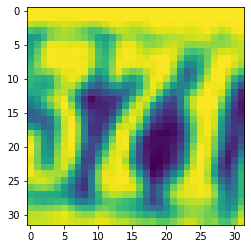

Label:  7


In [86]:
plt.imshow(X_train[30000])    # show number in the dataset
plt.show()
print('Label: ', y_train[30000])

It might be possible the model is learning this 7 in a wrong way. Like if there 3 and 1 on the sides of this image, it might recognize the number as 1. And after doing some subplots visualization earlier, we can see from the image, the image cropped along the x-axix(8,22) would be the correct image for training. So lets crop the image

In [0]:
X_train_new=[] # Create an empty list
def create_customCrop_train(X_train,X_train_new):
  for i in range(0,42000):
    img = X_train[i][:,10:23]
    X_train_new.append(img) # Crop and append it to list
  X_train_new = np.array(X_train_new) #After appending all cropped images, convert it back to numpy array
  return(X_train_new)
X_train_New = create_customCrop_train(X_train,X_train_new)

In [0]:
X_val_new = []
def create_customCrop_val(X_val,X_val_new):
  for i in range(0,18000):
    img = X_val[i][:,10:23]
    X_val_new.append(img)
  X_val_new = np.array(X_val_new)
  return(X_val_new)
X_val_New = create_customCrop_val(X_val,X_val_new)

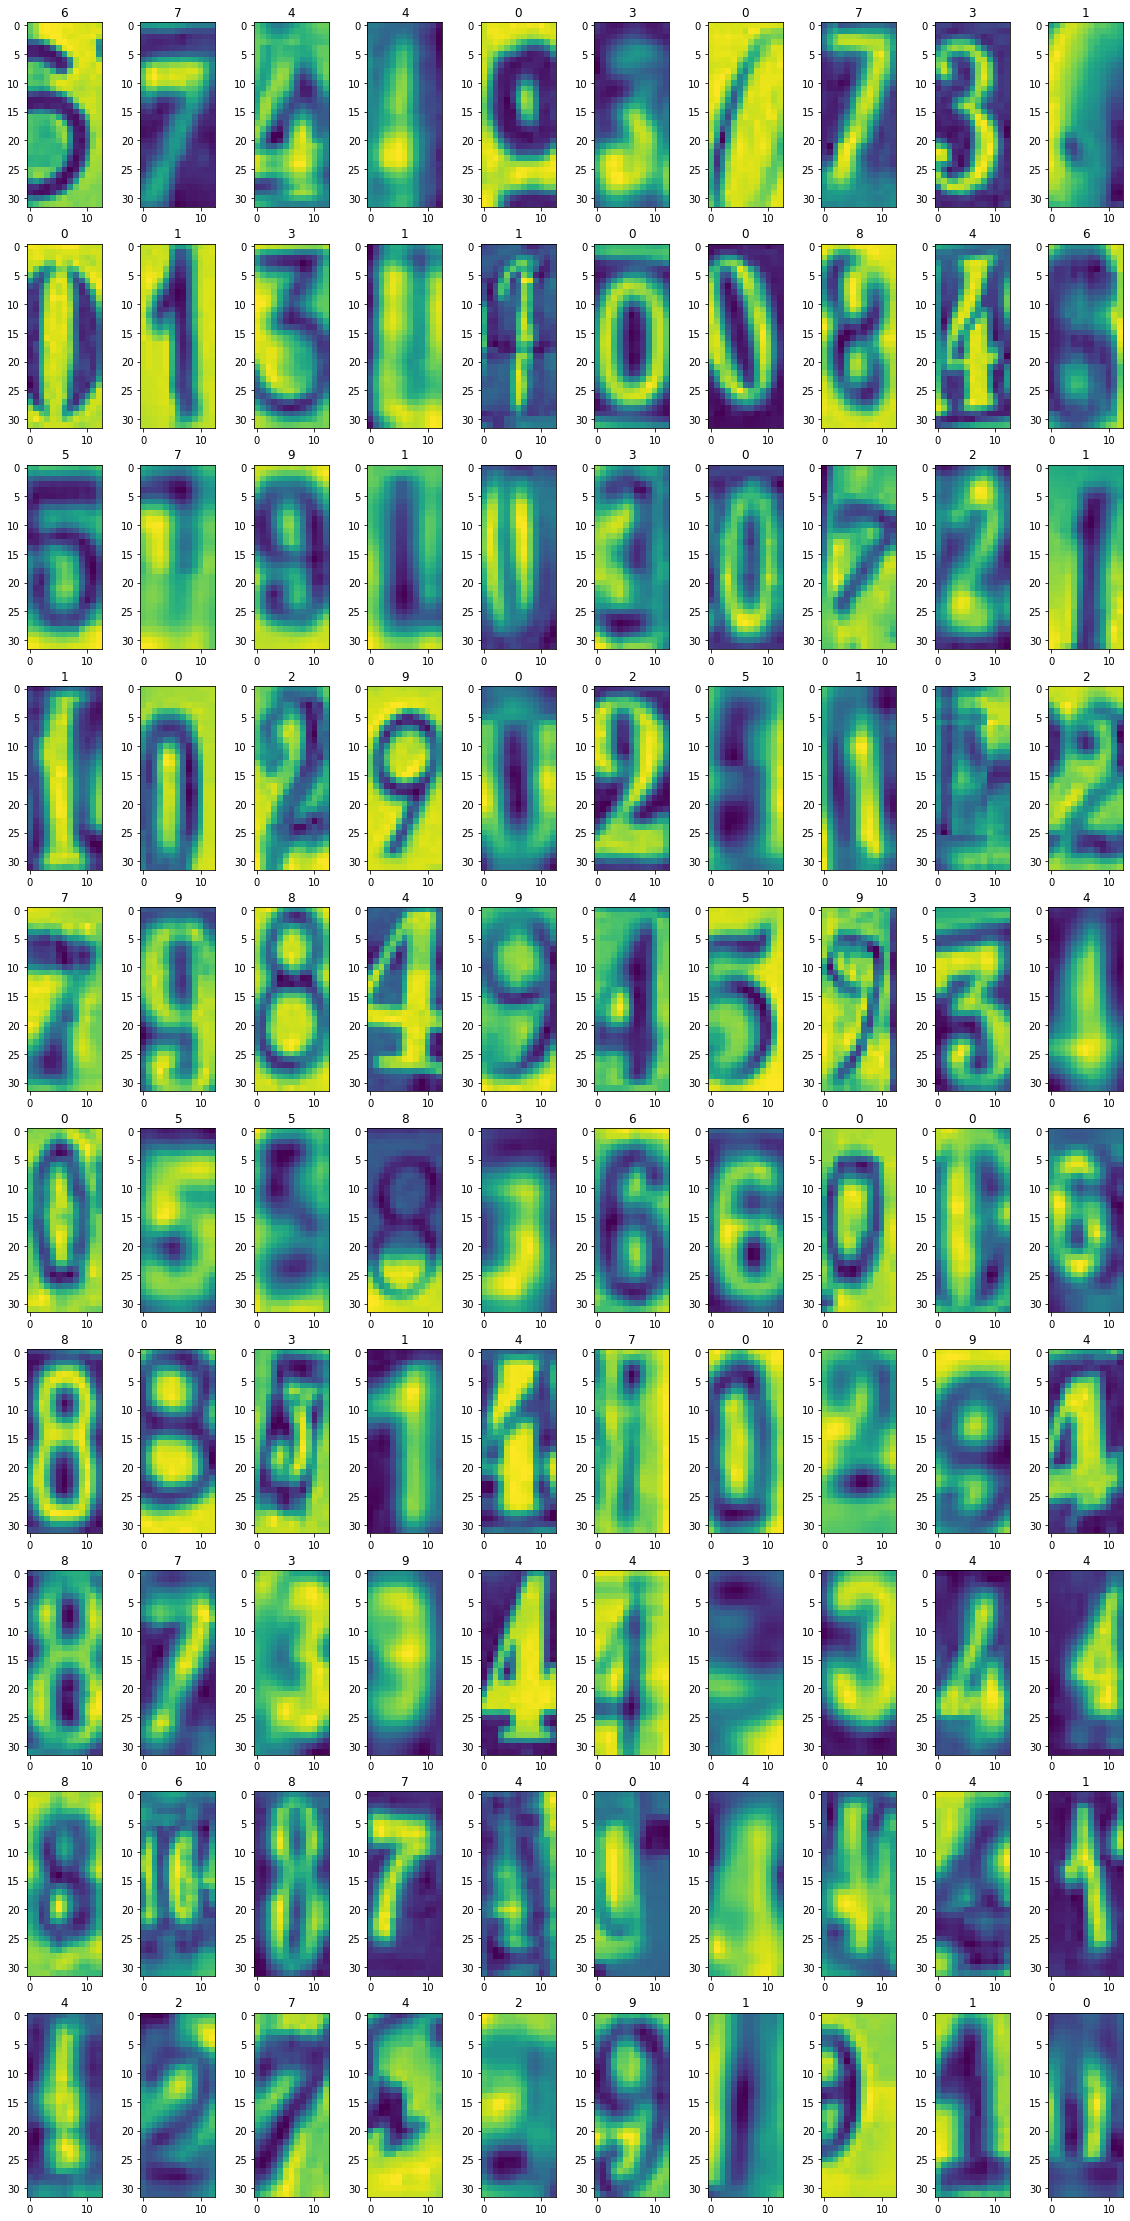

In [0]:
fig=plt.figure(figsize=(20, 40))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = X_train_New[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.title(y_train[i])
plt.show()

In [116]:
print(X_train_New.shape)
print(X_val_New.shape)

(42000, 32, 13)
(18000, 32, 13)


In [117]:
X_train_New = X_train_New.reshape(X_train_New.shape[0],416)
X_val_New = X_val_New.reshape(X_val_New.shape[0],416)

print(f'Xtrain Shape - {X_train_New.shape}')
print(f'Xval Shape - {X_val_New.shape}')

y_train = to_categorical(y_train,num_classes=10)
y_val = to_categorical(y_val,num_classes=10)

Xtrain Shape - (42000, 416)
Xval Shape - (18000, 416)


In [0]:
tf.keras.backend.clear_session()
tf.set_random_seed(42)
model = Sequential()

In [0]:
  model.add(tf.keras.layers.Dense(150, activation = 'relu',kernel_initializer='random_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.2))
  
  model.add(tf.keras.layers.Dense(100,activation='relu',kernel_initializer='random_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.2))
  
  model.add(tf.keras.layers.Dense(50,activation='relu',kernel_initializer='random_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.1))
 

  model.add(tf.keras.layers.Dense(10,activation='softmax',kernel_initializer='random_uniform'))


In [0]:
opt = optimizers.Adam(lr = 0.001,beta_1 = 0.9, beta_2 = 0.999,epsilon=1e-07)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [121]:
model.fit(X_train_New, y_train, batch_size = 750, epochs = 150, verbose = 1)

Train on 42000 samples
Epoch 1/150
42000/42000 [==============================] - 1s 16us/sample - loss: 1.8969 - acc: 0.4032
Epoch 2/150
42000/42000 [==============================] - 0s 10us/sample - loss: 1.2560 - acc: 0.6204
Epoch 3/150
42000/42000 [==============================] - 0s 11us/sample - loss: 1.0540 - acc: 0.6707
Epoch 4/150
42000/42000 [==============================] - 0s 10us/sample - loss: 0.9606 - acc: 0.6994
Epoch 5/150
42000/42000 [==============================] - 0s 11us/sample - loss: 0.9021 - acc: 0.7188
Epoch 6/150
42000/42000 [==============================] - 0s 10us/sample - loss: 0.8664 - acc: 0.7270
Epoch 7/150
42000/42000 [==============================] - 0s 10us/sample - loss: 0.8512 - acc: 0.7338
Epoch 8/150
42000/42000 [==============================] - 1s 12us/sample - loss: 0.8173 - acc: 0.7436
Epoch 9/150
42000/42000 [==============================] - 0s 10us/sample - loss: 0.7890 - acc: 0.7542
Epoch 10/150
42000/42000 [========================

In [122]:
results_train = model.evaluate(X_train_New, y_train)
results_test = model.evaluate(X_val_New, y_val)

print('Train accuracy: ', results_train[1])
print('Test accuracy: ', results_test[1])

18000/18000 [==============================] - 1s 68us/sample - loss: 0.5178 - acc: 0.8391
Train accuracy:  0.8655238
Test accuracy:  0.83905554


In [123]:
with h5.File('/content/drive/My Drive/DeepLearningProject_Academics/Data/SVHN_single_grey1.h5','r') as input_file:
  y_val = input_file['y_test'][:]

y_pred = model.predict_classes(X_val_New, batch_size=750, verbose=1)
pd.set_option('display.max_columns', 10)
cf_ML_new = pd.crosstab(y_pred, y_val)
cf_ML_new

18000/18000 [==============================] - 0s 6us/sample


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,1625,80,47,25,27,20,46,51,38,95
1,52,1569,23,25,44,13,16,70,36,22
2,9,13,1520,24,25,8,16,43,20,21
3,12,19,41,1339,18,49,30,33,45,24
4,19,48,29,23,1592,17,39,20,30,33
5,5,11,20,156,10,1551,101,7,56,65
6,26,21,8,30,34,69,1496,15,125,27
7,19,40,55,20,8,10,9,1543,10,16
8,16,14,22,46,16,20,72,7,1402,35


In [124]:
create_Metrics(cf_ML_new)

   Precision    Recall  F1-Score
0   0.895810  0.791139  0.840228
1   0.864939  0.763875  0.811272
2   0.837927  0.740019  0.785936
3   0.738148  0.651899  0.692347
4   0.877619  0.775073  0.823164
5   0.855017  0.755112  0.801965
6   0.824697  0.728335  0.773526
7   0.850606  0.751217  0.797828
8   0.772878  0.682571  0.724922
9   0.808159  0.713729  0.758014


It can be clearly seen from the numbers here.Accuracy at testing stage has improved, f1 score for almost all the classification has improved. The loss has been reduced

The only point to keep in mind is, whenever we receive new data, we must ensure that number to be predicted is in between 10 and 23 in the x-axis. If it is not, this method for cropping should not be used

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
def create_model(weight_initializer = 'random_uniform',dropout_rate=0.0, optimizer='Adam',learn_rate=0.001, momentum=0):
  model.add(tf.keras.layers.Dense(150, activation = 'relu',kernel_initializer='random_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(dropout_rate))

  model.add(tf.keras.layers.Dense(100,activation='relu',kernel_initializer='random_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(dropout_rate))

  model.add(tf.keras.layers.Dense(50,activation='relu',kernel_initializer='random_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(dropout_rate))

  model.add(tf.keras.layers.Dense(10,activation='softmax',kernel_initializer='random_uniform'))

  optimizer = optimizer(lr=learn_rate, momentum=momentum)
  model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [0]:
seed = 7
np.random.seed(seed)
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=1)

In [0]:
# define the grid search parameters
batch_size = [250,300,400,500,750]
epochs = [50, 75, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
#weight_initializer = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform','random_uniform']
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [0]:
param_For_grid = dict(optimizer=optimizer,dropout_rate=dropout_rate,learn_rate=learn_rate, momentum=momentum,batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_For_grid, n_jobs=1, cv=5)

In [74]:
grid_result = grid.fit(X_train_New, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'KerasClassifier' object has no attribute 'add'

  FitFailedWarning)


KeyboardInterrupt: ignored

In [0]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
